# QTS Final Version


In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import functools
import statistics
import math
import os
from datetime import datetime, timedelta
import random
import scipy as sp
import warnings
import gzip
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")
pd.options.mode.chained_assignment = None
import statsmodels
from statsmodels.regression.rolling import RollingOLS
import requests
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

# Senate and House of Representatives Trading Data

In [2]:
data_senate = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/trade_transactions.csv')
data_senate['disclosure_date'] = pd.to_datetime(data_senate['disclosure_date'])
data_senate = data_senate.set_index(data_senate['disclosure_date'])
data_senate = data_senate.sort_index()
data_senate = data_senate.dropna(subset=['ticker'])
data_senate

,transaction_date,disclosure_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,party,state,industry,sector,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
disclosure_date,,,,,,,,,,,,,,,,,,,,
2014-01-31,1/24/2014,2014-01-31,Spouse,GE,General Electric Company (NYSE),NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Consumer Electronics/Appliances,Energy,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/24/2014,2014-01-31,Spouse,CRM,"Salesforce.com, Inc (NYSE)",NaN,Purchase,"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Computer Software: Prepackaged Software,Technology,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/24/2014,2014-01-31,Spouse,FB,"Facebook, Inc. (NASDAQ)",NaN,Purchase,"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,"Computer Software: Programming, Data Processing",Technology,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/28/2014,2014-01-31,Spouse,EBAY,eBay Inc. (NASDAQ),NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Business Services,Miscellaneous,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/29/2014,2014-01-31,Spouse,C,"Citigroup, Inc. (NYSE)",NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Major Banks,Finance,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$15,001 - $50,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$50,001 - $100,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN


In [3]:
data_house = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/all_transactions_house (2).csv')
data_house['disclosure_date'] = pd.to_datetime(data_house['disclosure_date'])
data_house = data_house.set_index(data_house['disclosure_date'])
data_house = data_house.sort_index()
data_house = data_house.dropna(subset=['ticker'])
data_house = data_house[data_house['ticker'] != "--"]
data_house = data_house[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'amount', 'representative', 'party','state', 'industry' , 'sector' ]]

In [4]:
data_senate = data_senate[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'amount', 'senator', 'party','state', 'industry' , 'sector' ]]
data = pd.concat([data_house, data_senate]).sort_index()
data['representative'] = data['representative'].fillna(data['senator'])
del data['senator']

In [5]:
prices = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/project_price_df.csv')
most_frequent_tickers = pd.DataFrame(data['ticker'].value_counts()).iloc[:20,:]
most_frequent_sector = pd.DataFrame(data['sector'].value_counts())
most_frequent_politician = pd.DataFrame(data['representative'].value_counts()).iloc[:25,:]


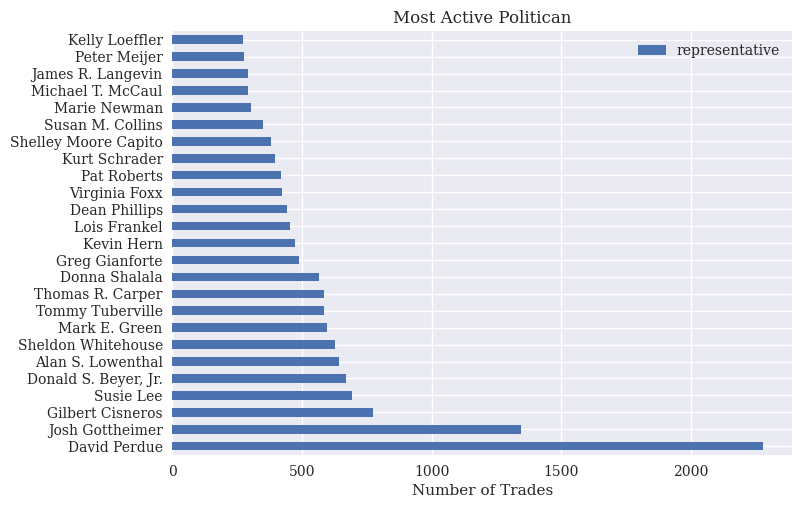

In [6]:
most_frequent_politician.plot.barh(stacked = 'True',title = 'Most Active Politican')
plt.xlabel('Number of Trades')
plt.legend()

# Importing Important Economic & Financial Variables

In [7]:
import quandl
import fredapi
apikey = 'J_fXGeVW_zC6RaDeJSQv'
quandl.ApiConfig.api_key = apikey
api_fred = 'caf2a437b55be8f56406870c1bed3521'
fred = fredapi.Fred(api_key= api_fred)

In [8]:
period_begin = '2004-01-01'
end_date = data.index[-1]

In [9]:
market = quandl.get_table('QUOTEMEDIA/PRICES', ticker = 'SPY',qopts = {'columns' : ['adj_close','date']}, date = {'gte':period_begin,'lte':end_date}).set_index('date').sort_index()
MARKET_RETURNS = market.resample('M').last().pct_change()
MARKET_RETURNS.columns = ['MKT_RETS']

interest_rates = quandl.get('YC/USA', start_date = period_begin,end_date = end_date)[['1-Month','3-Month','10-Year']]*(1/100)
interest_rates['term_spread'] = interest_rates['10-Year']-interest_rates['3-Month']
interest_rates = interest_rates.resample('M').last()
spy_earnings_yield = quandl.get('MULTPL/SP500_EARNINGS_YIELD_MONTH', start_date = period_begin, end_date = end_date).rename(columns={'Value':'MKT_EPS'})
consumer_sentiment = quandl.get('UMICH/SOC1',start_date = period_begin, end_date= end_date).rename(columns={'Value':'Industrial_Production'}).pct_change().fillna(0)

In [10]:
oil  = quandl.get('OPEC/ORB', start_date = period_begin, end_date=end_date).rename(columns={'Value':'OPEC_Crude_Price'})
oil = oil.resample('M').last()
oil_change = oil.pct_change()
inflation = quandl.get('RATEINF/CPI_USA', start_date = '2002-01-01', end_date = end_date).rename(columns={'Value':'CPI'})
inflation_rets = inflation.pct_change()
inflation['inflation_shift'] = inflation.shift(12)
inflation['YoY_Change'] = (inflation['CPI']/inflation['inflation_shift'])-1
inflation.dropna(inplace=True)


In [11]:
# Downloading AAA and BAA corporate bond yield from FRED WEBSIDE
AAA = pd.DataFrame(fred.get_series('DAAA'), columns = ['AAA_Yield'])*(1/100)
BAA = pd.DataFrame(fred.get_series('DBAA'), columns=['BAA_Yield'])*(1/100)
corporate_bond_yields = BAA.join(AAA, how = 'inner')
corporate_bond_yields = corporate_bond_yields.fillna(corporate_bond_yields.mean())
corporate_bond_yields['dsspread'] = corporate_bond_yields.BAA_Yield - corporate_bond_yields.AAA_Yield
corporate_bonds = corporate_bond_yields.resample('M').last()

In [12]:
mprices = market.resample('M').last()
spy_mend_eps = spy_earnings_yield.resample('M').last()
spy_mend_eps = spy_mend_eps.rolling(12).sum()
EPRATIO = pd.DataFrame(np.log(spy_mend_eps).values - np.log(mprices).values, columns=['EPRATIO'], index = mprices.index)

In [13]:
TB3_Rate_Lag1 = interest_rates[['3-Month']].shift(3)
TB3_Rate_Lag1.columns = ['Three_M_TBill_Lag3']
tsspread_lag1 = interest_rates[['term_spread']].shift(3)
tsspread_lag1.columns = ['term_spread_lag3']
dsspread_lag1 = corporate_bonds[['dsspread']].shift(6)
dsspread_lag1.columns = ['dsspread_lag6']
epratio_lag1 = EPRATIO.shift(1)
epratio_lag1.columns = ['epratio_lag1']
consumer_sentiment_lag1 = consumer_sentiment.shift(3)
oil_lag =  oil_change.shift(2)
oil_lag.columns = ['Oil_Rets_lag2']
oil_rets_sq = (oil_change.shift(2))**2
oil_rets_sq.columns =['Oil_Rets_Squared']
inflation_lag2 = inflation[['YoY_Change']].shift(2)
inflation_lag2.columns = ['Inflation_YOY_lag2']
inflation_yoy_sq = (inflation[['YoY_Change']].shift(2))**2
inflation_yoy_sq.columns = ['Inflation_YOY_Squared']

consumer_sentiment_lag1.columns = ['UMICH_Consumer_Sentiment_lag3']

## Importing Tickers

In [14]:
trade_strat_tickers = ['SPY','SQQQ','TQQQ','TTT','UPRO','SDS']
trade_data = quandl.get_table('QUOTEMEDIA/PRICES', ticker = trade_strat_tickers, qopts = {'columns':['date','ticker','adj_close']},paginate = True, date = {'gte':'2000-01-01','lte':'2023-03-01'}).set_index('date').sort_index()
trade_df_full = trade_data.pivot_table(columns='ticker',values = 'adj_close', index = trade_data.index)
trade_df_cleaned = trade_data.pivot_table(columns='ticker',values = 'adj_close', index = trade_data.index).dropna()
trade_df_daily_rets = trade_df_cleaned.pct_change().dropna()
trade_df_monthly_rets = trade_df_cleaned.resample('M').last().pct_change().dropna()

In [15]:
# Getting Funding Rates for taking short positions
repo = (quandl.get('YC/USA1M', start_date = '2000-01-01', end_date = '2023-03-01', returns = 'pandas')-1)*(1/100)
repo.columns = ['Funding_Rate']

In [16]:
def filter_trade_type(trade_type:str):
    if trade_type == 'Purchase':
        trade_type = 'Buy'
    elif trade_type == 'purchase':
        trade_type = 'Buy'
    elif trade_type == 'sale':
        trade_type = 'Sell'
    elif trade_type == 'Sale (Partial)':
        trade_type = 'Sell'
    elif trade_type == 'sale_partial':
        trade_type = 'Sell'
    elif trade_type == 'Sale (Full)':
        trade_type = 'Sell'
    elif trade_type == 'sale_full':
        trade_type = 'Sell'
    return trade_type

In [17]:
data_copy = data.copy()

In [18]:
data_copy['type']  = data_copy['type'].apply(filter_trade_type)
data_copy = data_copy[(data_copy.type == "Buy")|(data_copy.type == "Sell")]

- Constructing PTI **Person-Based-Trading Index**

In [19]:
PTI_df = data_copy[['transaction_date','ticker','type']]
p = data_copy[['ticker','type','representative']]
p['Date'] = p.index
trades_grouped = p.groupby([pd.Grouper(key='Date'),'representative','ticker','type']).nunique().reset_index()
trades_grouped = trades_grouped.pivot_table(index = 'Date',columns='type', values='ticker',aggfunc='count').fillna(0)


In [20]:
# Use Trades Grouped to Calculate Trading Index
trades_grouped['Difference'] = trades_grouped['Buy']-trades_grouped['Sell']
trades_grouped['No_Trades'] = trades_grouped['Buy'] + trades_grouped['Sell']

In [21]:
buys_sells = PTI_df.pivot_table(index = PTI_df.index, columns='type',values='ticker',aggfunc='count')
buys_sells = buys_sells.fillna(0)
buys_sells['Difference'] = buys_sells['Buy'] - buys_sells['Sell']
buys_sells['No_Trades'] = buys_sells['Buy'] + buys_sells['Sell']


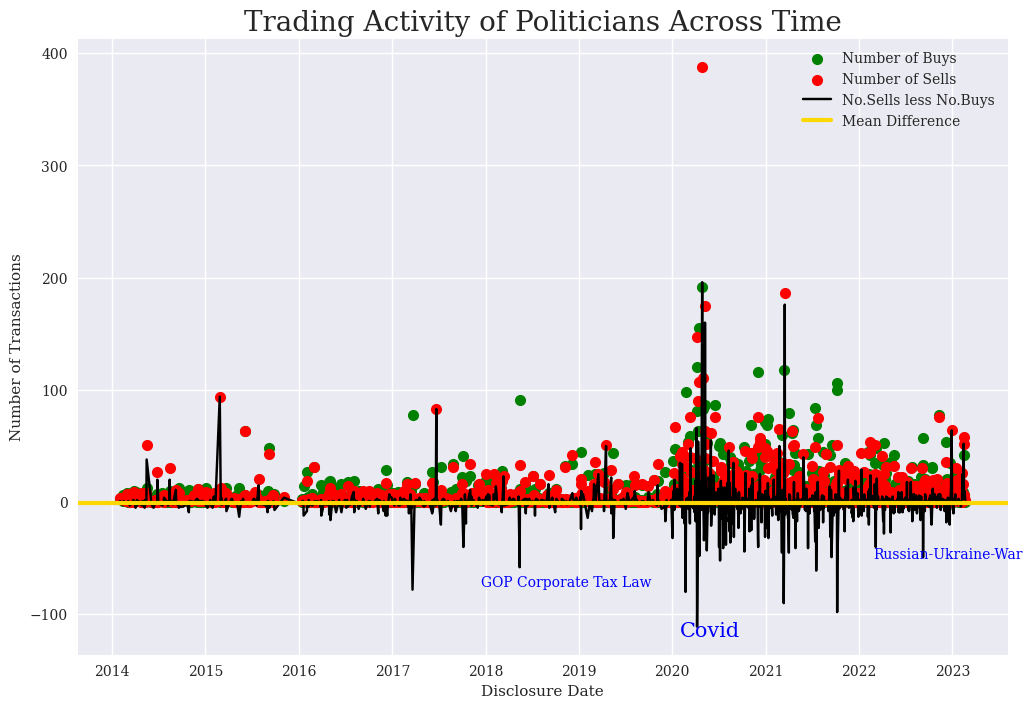

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(buys_sells.index,buys_sells.Buy, c = 'green', label = 'Number of Buys', linewidth = 1)
plt.scatter(buys_sells.index,buys_sells.Sell, c = 'red', label = 'Number of Sells', linewidth = 1)
plt.plot(buys_sells.Sell- buys_sells.Buy,c='black',label= 'No.Sells less No.Buys')
plt.axhline((buys_sells.Sell-buys_sells.Buy).mean(), label = 'Mean Difference', linewidth = 3,color = 'gold')
plt.text(pd.to_datetime('2020-01-30'), -120,'Covid', c ='blue', fontsize = 15)
plt.text(pd.to_datetime('2022-02-24'),-50,'Russian-Ukraine-War', c = 'blue', fontsize = 10)
plt.text(pd.to_datetime('2017-12-15'),-75,'GOP Corporate Tax Law', c = 'blue', fontsize = 10)
plt.legend(loc =0)
plt.xlabel('Disclosure Date')
plt.ylabel('Number of Transactions')
plt.title('Trading Activity of Politicians Across Time', fontsize = 20)
plt.savefig('Trading_Activity.png')


- As you can see from the chart above there are spikes in the **Number of Buys** and **Number of Sells** on any given disclosure date. It begs the question of why? It is human nature that when it comes to money - generally speaking- we are always motiviated in our self interest. Yes, the **STOCK ACT** is *supposed* to prohibit members of Congress and employees of Congress from using priviate information derived from their official positions for their personal benefit. In the court of law, proving such insider trading is probably impossible and not a top priority for the Department of Justice. With that being said, I believe we can find a predictive signal from aggregate *buying* and *selling* activity of United States Politicians. 

- Since politicians are privy to sensitive economic, geopolitical, and other important information before others know, we can get a better understanding of their psychological mindset. *Buying* and *Selling* relate to fear and greed. If politicians know senstive macroeconomic information, they will without a doubt react emotionally through buying and selling out of greed or fear. 
- For example, even though many investors *knew* about Covid-19, **many investors did not know** just how bad it would affect the global economy. However, being that polticians are surrouded by top scientists and the most up-to-date information, they have a better perspective on the gravity of the situation. It would make sense they would trade on this knowledge by selling off assets and raising cash to protect their money. 

- In the following week, month, or even quarter markets will begin to *price-in* this negative sentiment.

In [23]:
pti_index = trades_grouped.groupby(pd.Grouper(freq = '1m')).sum()
pti_index['PTI_Index'] = pti_index.Difference/pti_index['No_Trades']
pti_index = pti_index.replace(0,.0001)
# Calculating Z-score PTI_Index
pti_index['Z_PTI_Index'] = (pti_index['PTI_Index']-pti_index['PTI_Index'].mean())/(pti_index['PTI_Index'].std())

In [24]:
pti_index.describe()

type,Buy,Sell,Difference,No_Trades,PTI_Index,Z_PTI_Index
count,110.000000,110.000000,110.000000,110.000000,108.000000,1.080000e+02
mean,77.400002,78.890911,-1.490904,156.290911,0.012422,-2.261565e-17
std,96.077013,106.455257,36.027193,199.572217,0.252956,1.000000e+00
min,0.000100,0.000100,-162.000000,0.000100,-0.839286,-3.367020e+00
25%,18.250000,16.000000,-10.000000,35.000000,-0.089661,-4.035606e-01
50%,30.000000,32.000000,0.000100,66.000000,0.000100,-4.871139e-02
75%,117.000000,123.000000,10.000000,243.250000,0.159278,5.805583e-01
max,626.000000,748.000000,89.000000,1374.000000,0.846154,3.295958e+00


In [25]:
PTI_lag1 = pti_index[['Z_PTI_Index']].shift(2)
PTI_lag1.columns = ['Z_PTI_Lag2']
#PTI_lag1['Z_PTI_Index_Shift_3'] = pti_index[['Z_PTI_Index']].shift(3)
#PTI_lag1.columns = ['Z_PTI_Lag2', 'Z_PTI_Lag3']

MARKET_lag1 = MARKET_RETURNS.shift(1)
MARKET_lag1.columns = ['MKT_Rets_Lag1']
MARKET_lag2 = MARKET_RETURNS.shift(2)
MARKET_lag2.columns = ['MKT_Rets_lag2']
MARKET_lag3 = MARKET_RETURNS.shift(3)
MARKET_lag3.columns = ['MKT_Rets_Lag3']
MARKET_lag4 = MARKET_RETURNS.shift(4)
MARKET_lag4.columns = ['MKT_Rets_lag4']
MARKET_lag6 = MARKET_RETURNS.shift(6)
MARKET_lag6.columns = ['MKT_Rets_Lag6']
MARKET_lag9 = MARKET_RETURNS.shift(9)
MARKET_lag9.columns = ['MKT_Rets_Lag9']
MARKET_lag12 = MARKET_RETURNS.shift(12)
MARKET_lag12.columns = ['MKT_Rets_Lag12']
MARKET_Lag24 = MARKET_RETURNS.shift(24)
MARKET_Lag24.columns = ['MKT_Rets_Lag24']

In [26]:
DATA_MATRIX = PTI_lag1

In [27]:

DATA_MATRIX = DATA_MATRIX.merge(MARKET_RETURNS,left_index=True,right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag2, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag3, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag4, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag6, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag12, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

DATA_MATRIX = DATA_MATRIX.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(tsspread_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(dsspread_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(epratio_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(oil_lag, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(oil_rets_sq, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(inflation_lag2, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(inflation_yoy_sq, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(consumer_sentiment_lag1, left_index=True, right_index=True)

In [28]:
corr_mat = DATA_MATRIX.corr()
corr_mat = pd.DataFrame(corr_mat.unstack().sort_values(), columns=['Correlation'])
corr_mat = corr_mat.loc[corr_mat.Correlation != 1]

In [29]:
corr_mat

Correlation
Three_M_TBill_Lag3    term_spread_lag3         -0.697357
term_spread_lag3      Three_M_TBill_Lag3       -0.697357
Inflation_YOY_lag2    epratio_lag1             -0.688873
epratio_lag1          Inflation_YOY_lag2       -0.688873
                      Inflation_YOY_Squared    -0.617596
...                                                  ...
MKT_Rets_lag2         Oil_Rets_lag2             0.390372
term_spread_lag3      epratio_lag1              0.449615
epratio_lag1          term_spread_lag3          0.449615
Inflation_YOY_lag2    Inflation_YOY_Squared     0.966515
Inflation_YOY_Squared Inflation_YOY_lag2        0.966515

[306 rows x 1 columns]

In [30]:
pti_index[['PTI_Index']].describe()

type,PTI_Index
count,108.000000
mean,0.012422
std,0.252956
min,-0.839286
25%,-0.089661
50%,0.000100
75%,0.159278
max,0.846154


In [31]:
pti_index[['No_Trades']].idxmax()

type
No_Trades   2020-04-30
dtype: datetime64[ns]

In [32]:
pti_index[['No_Trades']].idxmin()

type
No_Trades   2015-10-31
dtype: datetime64[ns]

In [33]:
pti_index[['PTI_Index']].idxmin()

type
PTI_Index   2015-02-28
dtype: datetime64[ns]

In [34]:
pti_index[['PTI_Index']].idxmax()

type
PTI_Index   2015-08-31
dtype: datetime64[ns]

- The average monthly change of aggregate buying and selling of politicians since 2014 is $1.242\%$. This means that on average, politicians were generally buying more *by 1.242%* than selling. The standard deviation of the index is $25.29\%$. Even though there was significant trading levels starting at the onset of the pandemic, the greatest percent changes in absolute values of the PTI Index happened at the beginning of 2015 and end of 2015. I believe the spike in selling in *early 2015* was closely related to the sharp rise of OIL Prices during early 2015. 
- The sharp increase in the PTI index in the month of August 2015 could potentially be related to China's decision to weaken the Yuan in hopes of fostering further GDP growth and exportation of their cheap goods. Politicians may have reacted positively at this news. 

In [35]:
DATA_MATRIX.describe()

,Z_PTI_Lag2,MKT_RETS,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,MKT_Rets_Lag6,MKT_Rets_Lag12,MKT_Rets_Lag24,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,Oil_Rets_lag2,Oil_Rets_Squared,Inflation_YOY_lag2,Inflation_YOY_Squared,UMICH_Consumer_Sentiment_lag3
count,105.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,1.090000e+02,109.000000
mean,0.018455,0.009768,0.009429,0.010229,0.010144,0.009689,0.011110,0.012938,0.012351,0.008049,0.012953,0.009082,-1.583918,0.006660,0.017244,0.025339,1.181138e-03,-0.001034
std,1.004145,0.044039,0.043767,0.043326,0.043245,0.042748,0.041667,0.038821,0.038110,0.009516,0.008067,0.002341,0.468024,0.131753,0.047340,0.023325,2.064326e-03,0.051008
min,-3.367020,-0.124643,-0.124643,-0.124643,-0.124643,-0.124643,-0.124643,-0.124643,-0.124643,0.000000,-0.004900,0.005400,-2.545365,-0.549512,0.000001,-0.001995,6.315069e-08,-0.194164
25%,-0.387957,-0.013791,-0.013791,-0.013438,-0.013438,-0.013438,-0.010190,-0.002560,-0.002560,0.000500,0.007500,0.007100,-1.876111,-0.062847,0.000772,0.012371,1.530348e-04,-0.022335
50%,-0.011812,0.015119,0.015119,0.017012,0.017012,0.017012,0.017761,0.018079,0.017761,0.002900,0.012800,0.008800,-1.563175,0.008126,0.004468,0.018115,3.281405e-04,0.002037
75%,0.587050,0.036471,0.036198,0.036198,0.036198,0.032416,0.036198,0.036198,0.032416,0.015500,0.019300,0.010200,-1.223334,0.066841,0.014753,0.025000,6.250211e-04,0.028807
max,3.295958,0.126984,0.126984,0.126984,0.126984,0.126984,0.126984,0.126984,0.126984,0.042200,0.029700,0.019000,-0.811184,0.607202,0.368695,0.090598,8.207921e-03,0.130097


|       |   Z_PTI_Lag2 |     MKT_RETS |   MKT_Rets_Lag1 |   MKT_Rets_lag2 |   MKT_Rets_Lag3 |   MKT_Rets_lag4 |   MKT_Rets_Lag6 |   MKT_Rets_Lag12 |   MKT_Rets_Lag24 |   Three_M_TBill_Lag3 |   term_spread_lag3 |   dsspread_lag6 |   epratio_lag1 |   Oil_Rets_lag2 |   Oil_Rets_Squared |   Inflation_YOY_lag2 |   Inflation_YOY_Squared |   UMICH_Consumer_Sentiment_lag3 |
|:------|-------------:|-------------:|----------------:|----------------:|----------------:|----------------:|----------------:|-----------------:|-----------------:|---------------------:|-------------------:|----------------:|---------------:|----------------:|-------------------:|---------------------:|------------------------:|--------------------------------:|
| count |  105         | 109          |    109          |     109         |     109         |    109          |     109         |      109         |      109         |         109          |       109          |    109          |     109        |    109          |      109           |         109          |           109           |                    109          |
| mean  |    0.0184549 |   0.00976819 |      0.00942881 |       0.0102289 |       0.0101438 |      0.00968877 |       0.0111099 |        0.0129378 |        0.0123506 |           0.00804862 |         0.0129532  |      0.00908248 |      -1.58392  |      0.00665979 |        0.0172439   |           0.025339   |             0.00118114  |                     -0.00103416 |
| std   |    1.00415   |   0.0440388  |      0.0437674  |       0.043326  |       0.0432451 |      0.0427478  |       0.0416665 |        0.0388214 |        0.0381101 |           0.00951567 |         0.00806709 |      0.00234101 |       0.468024 |      0.131753   |        0.0473398   |           0.0233252  |             0.00206433  |                      0.0510079  |
| min   |   -3.36702   |  -0.124643   |     -0.124643   |      -0.124643  |      -0.124643  |     -0.124643   |      -0.124643  |       -0.124643  |       -0.124643  |           0          |        -0.0049     |      0.0054     |      -2.54536  |     -0.549512   |        1.13865e-06 |          -0.00199517 |             6.31507e-08 |                     -0.194164   |
| 25%   |   -0.387957  |  -0.0137912  |     -0.0137912  |      -0.0134376 |      -0.0134376 |     -0.0134376  |      -0.0101904 |       -0.0025598 |       -0.0025598 |           0.0005     |         0.0075     |      0.0071     |      -1.87611  |     -0.0628466  |        0.00077186  |           0.0123707  |             0.000153035 |                     -0.022335   |
| 50%   |   -0.0118118 |   0.0151195  |      0.0151195  |       0.0170116 |       0.0170116 |      0.0170116  |       0.0177608 |        0.0180789 |        0.0177608 |           0.0029     |         0.0128     |      0.0088     |      -1.56317  |      0.00812553 |        0.00446772  |           0.0181146  |             0.00032814  |                      0.00203666 |
| 75%   |    0.58705   |   0.0364713  |      0.0361982  |       0.0361982 |       0.0361982 |      0.0324158  |       0.0361982 |        0.0361982 |        0.0324158 |           0.0155     |         0.0193     |      0.0102     |      -1.22333  |      0.066841   |        0.0147528   |           0.0250004  |             0.000625021 |                      0.0288066  |
| max   |    3.29596   |   0.126984   |      0.126984   |       0.126984  |       0.126984  |      0.126984   |       0.126984  |        0.126984  |        0.126984  |           0.0422     |         0.0297     |      0.019      |      -0.811184 |      0.607202   |        0.368695    |           0.0905976  |             0.00820792  |                      0.130097   |

## Regression

- I will estimate this model:

$$
\begin{aligned}
\hat{r}_{spy,t} = &\beta_{0} + \beta_{1}\cdot Zpti_{t-2} + \beta_{2}\cdot r_{spy,t-1}+\beta_{3}\cdot r_{spy,t-2} \\
&+ \beta_{4}\cdot r_{spy,t-3} + \beta_{5}\cdot r_{spy,t-4} + \beta_{6}\cdot r_{TBILL,t-3} + \beta_{7}\cdot TermSpread_{t-3} \\
&+ \beta_{8} \cdot DefaultSpread_{t-6} + \beta_{9} \cdot EPRATIO_{t-1} + \beta_{10} \cdot r_{oil,t-2} \\
&+ \beta_{11} \cdot r^{2}_{oil,t-2} + \beta_{12} \cdot Inflation_{yoy,t-2} + \beta_{13} \cdot Inflation^{2}_{yoy,t-2} +\varepsilon_{t}
\end{aligned}
$$


In [36]:
DATA_MATRIX.columns

Index(['Z_PTI_Lag2', 'MKT_RETS', 'MKT_Rets_Lag1', 'MKT_Rets_lag2',
       'MKT_Rets_Lag3', 'MKT_Rets_lag4', 'MKT_Rets_Lag6', 'MKT_Rets_Lag12',
       'MKT_Rets_Lag24', 'Three_M_TBill_Lag3', 'term_spread_lag3',
       'dsspread_lag6', 'epratio_lag1', 'Oil_Rets_lag2', 'Oil_Rets_Squared',
       'Inflation_YOY_lag2', 'Inflation_YOY_Squared',
       'UMICH_Consumer_Sentiment_lag3'],
      dtype='object')

In [37]:
multiple_ols = smf.ols(formula='MKT_RETS ~ Z_PTI_Lag2 + MKT_Rets_Lag1 +MKT_Rets_lag2 ++ MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+Oil_Rets_Squared+Inflation_YOY_lag2+Inflation_YOY_Squared+UMICH_Consumer_Sentiment_lag3', data = DATA_MATRIX)
results = multiple_ols.fit(disp = 0)

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MKT_RETS   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     2.330
Date:                Tue, 07 Mar 2023   Prob (F-statistic):            0.00862
Time:                        10:18:44   Log-Likelihood:                 194.70
No. Observations:                 105   AIC:                            -359.4
Df Residuals:                      90   BIC:                            -319.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0823      0.059      1.394      0.167      -0.035       0.200
Z_PTI_Lag2                        0.0107      0.004      2.464      0.016       0.002       0.019
MKT_Rets_Lag1                    -0.3278      0.106     -3.099      0.003      -0.538      -0.118
MKT_Rets_lag2                    -0.2698      0.124     -2.174      0.032      -0.516      -0.023
MKT_Rets_Lag3                    -0.1569      0.117     -1.343      0.183      -0.389       0.075
MKT_Rets_lag4                    -0.1748      0.124     -1.412      0.161      -0.421       0.071
Three_M_TBill_Lag3               -1.2488      1.020     -1.224      0.224      -3.275       0.778
term_spread_lag3                 -2.2658      1.413     -1.603      0.112      -5.073       0.541
dsspread_lag6                    -2.1191      2.242     -0.945      0.347      -6.573       2.335
epratio_lag1                      0.0105      0.023      0.448      0.655      -0.036       0.057
Oil_Rets_lag2                     0.0512      0.038      1.364      0.176      -0.023       0.126
Oil_Rets_Squared                  0.1559      0.104      1.492      0.139      -0.052       0.363
Inflation_YOY_lag2                0.9976      1.049      0.951      0.344      -1.087       3.082
Inflation_YOY_Squared           -14.1639      9.933     -1.426      0.157     -33.898       5.570
UMICH_Consumer_Sentiment_lag3     0.2185      0.092      2.370      0.020       0.035       0.402
==============================================================================
Omnibus:                       33.862   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.694
Skew:                          -1.231   Prob(JB):                     3.66e-17
Kurtosis:                       6.352   Cond. No.                     4.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
table = pd.DataFrame({'Beta_Coefficients': results.params,'SE':results.bse,'t_stat':results.tvalues,'pval':results.pvalues})
table = np.round(table, 5)


## Model OLS Statisitics

|                               |   Beta_Coefficients |      SE |   t_stat |    pval |
|:------------------------------|--------------------:|--------:|---------:|--------:|
| Intercept                     |             0.0823  | 0.05903 |  1.39422 | 0.16668 |
| Z_PTI_Lag2                    |             0.01075 | 0.00436 |  2.46382 | 0.01565 |
| MKT_Rets_Lag1                 |            -0.32779 | 0.10576 | -3.09937 | 0.00259 |
| MKT_Rets_lag2                 |            -0.26984 | 0.1241  | -2.17437 | 0.0323  |
| MKT_Rets_Lag3                 |            -0.15693 | 0.11687 | -1.34279 | 0.18272 |
| MKT_Rets_lag4                 |            -0.17476 | 0.12374 | -1.41229 | 0.16131 |
| Three_M_TBill_Lag3            |            -1.2488  | 1.01994 | -1.22438 | 0.22401 |
| term_spread_lag3              |            -2.26582 | 1.41304 | -1.6035  | 0.11233 |
| dsspread_lag6                 |            -2.11906 | 2.24185 | -0.94523 | 0.34707 |
| epratio_lag1                  |             0.01047 | 0.02339 |  0.4477  | 0.65544 |
| Oil_Rets_lag2                 |             0.0512  | 0.03754 |  1.36384 | 0.17602 |
| Oil_Rets_Squared              |             0.15586 | 0.10449 |  1.49167 | 0.13928 |
| Inflation_YOY_lag2            |             0.99759 | 1.04922 |  0.95079 | 0.34426 |
| Inflation_YOY_Squared         |           -14.1639  | 9.9331  | -1.42593 | 0.15735 |
| UMICH_Consumer_Sentiment_lag3 |             0.21848 | 0.09219 |  2.36977 | 0.01994 |



- The coefficient on **Z-PTI is very statistically significant.** .Thus,holding other factors fixed, a one-standard devation or roughly a $25\%$ increase in the PTI index will *on average increase market returns by 100 basis points*.
- This partial effect is very large, however, one major problem I will have to address when I forcast future returns is that I will never know the **true distribution of the PTI Index**. This will force me to regress on the 2-month lagged PTI_index instead of the z-scored PTI_Index. 

## Explanation of other Variables

- Above you can see that I controlled for the lagged market returns to try and control for serial correlation between $\varepsilon_{t}$ and $\hat{r}_{spy,t}$.
- The *negative coefficients* on three month treasury bill rates, default spreads (defined as BAA yields less AAA yields) both make economic sense. If yields rise, **the present value of all future discounted cashflows declines.** This would cause returns to decline negatively, as investors would sell off equities and allocate more to fixed-income. Additionally, higher yields indicate **increased risk.** When risk aversion increases, it would economically make sense there would be a sell-off in assets. 

- I wanted to square Oil returns and Inflation returns to uncover either increasing/decreasing marginal effects. It turns out that on average, 2-month lagged oil price percent changes have an increasing marginal effect. This was surprising to me, but the effect is *small.* The coefficient on inflation tells an interesting and economically logical story. While small year over year changes in inflation  mean the market environment is *stable*, drastic increases in inflation actually will without a doubt hurt future one-month spy returns. In fact, the average partial effect of inflation can be characterized as $\frac{\partial r_{spy,t}}{\partial infl_{t-2}}$ = $.99752 - 28.3278\cdot r_{infl,t-2}$. This means if $r_{infl,t-2} > 3.5213\%$, then **expected future market returns will decline on average.**


- There is no meaningful interpretation from the intercept.


### Conclusion of Beta Coefficients

- Overall, I am happy with the magnitudes of the coefficients. The important variables (Dsspread, Oil Returns, Inflation, Term Spread,Three Month Treasury Bills, UMICH_Consumer Sentiment) all make economic sense. Even if some of the coefficients are not statistically significant at a certain confidence threshold, the coeffients that are most important are **consistent and unbiased.**

- The Adjusted R-squared of 15.2% just means 15.2% of the variance in spy returns can be explained by my independent variables. This low R-squared is expected, especially when trying to fit a model around something incredibly noisy. The error variance will be large because of the random components associated with market returns. **However,** if there is a way to capture the future direction of asset returns by my consistent beta estimates, I believe there is a way to get an *edge.*


In [40]:
smf.ols('MKT_RETS~MKT_Rets_Lag1', data =DATA_MATRIX ).fit(disp = 0).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MKT_RETS   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.185
Date:                Tue, 07 Mar 2023   Prob (F-statistic):             0.0432
Time:                        10:18:44   Log-Likelihood:                 188.30
No. Observations:                 109   AIC:                            -372.6
Df Residuals:                     107   BIC:                            -367.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0116      0.004      2.729      0.007       0.003       0.020
MKT_Rets_Lag1    -0.1952      0.095     -2.046      0.043      -0.384      -0.006
==============================================================================
Omnibus:                       12.424   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.373
Skew:                          -0.728   Prob(JB):                      0.00125
Kurtosis:                       3.908   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
predictions = pd.DataFrame(results.fittedvalues, columns=['Forecasted_Market_Return'])
observed_values  = DATA_MATRIX[['MKT_RETS']]
dependendent_variables = predictions.join(observed_values, how = 'inner')
errors = pd.DataFrame(results.resid,columns=['Residuals'])

In [42]:
dependendent_variables.corr()

,Forecasted_Market_Return,MKT_RETS
Forecasted_Market_Return,1.000000,0.515763
MKT_RETS,0.515763,1.000000


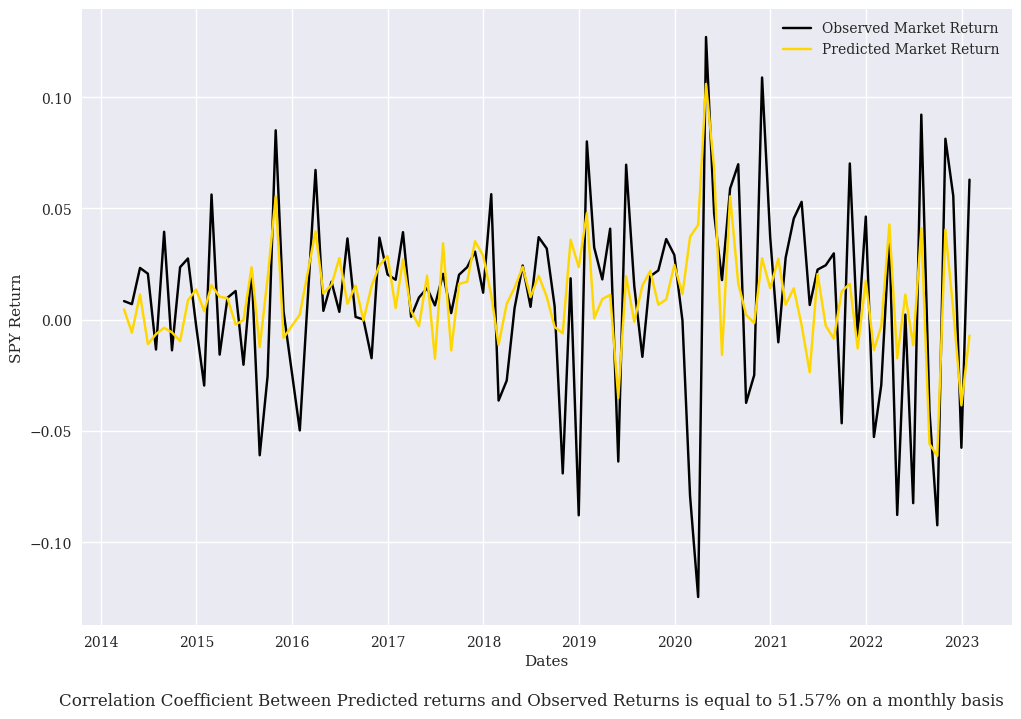

In [43]:
txt = 'Correlation Coefficient Between Predicted returns and Observed Returns is equal to 51.57% on a monthly basis'
plt.figure(figsize=(12,8))

plt.plot(dependendent_variables.MKT_RETS, color = 'black',label = 'Observed Market Return')
plt.plot(dependendent_variables['Forecasted_Market_Return'], color = 'gold',label ='Predicted Market Return')
plt.figtext(x = .5,y = 0.01, s = txt, fontsize = '12', wrap = True, horizontalalignment = 'center')
plt.ylabel('SPY Return')
plt.xlabel('Dates')
plt.legend(loc = 0)

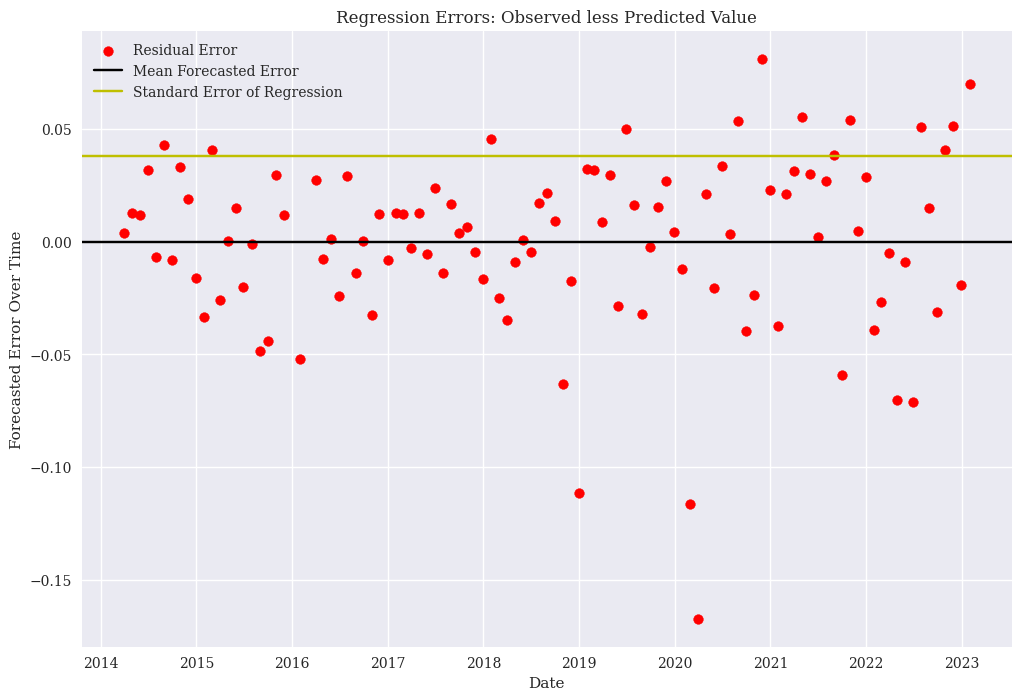

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(errors.index,errors, label = 'Residual Error', c = 'red')
plt.axhline(0,label = 'Mean Forecasted Error', c= 'black')
plt.axhline(errors.std().values, label = 'Standard Error of Regression', c = 'y')
plt.title('Regression Errors: Observed less Predicted Value')
plt.xlabel('Date')
plt.ylabel('Forecasted Error Over Time')

plt.legend(loc = 0)

## Test for Serial Correlation

In [45]:
errors['Residual_Lag'] = errors.Residuals.shift(1)

In [46]:
smf.ols(formula='Residuals~Residual_Lag',data = errors).fit(disp =0).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Residuals   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.06080
Date:                Tue, 07 Mar 2023   Prob (F-statistic):              0.806
Time:                        10:18:45   Log-Likelihood:                 192.39
No. Observations:                 104   AIC:                            -380.8
Df Residuals:                     102   BIC:                            -375.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.868e-05      0.004     -0.005      0.996      -0.007       0.007
Residual_Lag     0.0248      0.101      0.247      0.806      -0.175       0.224
==============================================================================
Omnibus:                       31.151   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.433
Skew:                          -1.172   Prob(JB):                     1.02e-14
Kurtosis:                       6.061   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- No evidence of serial correlation between errors, because I included lagged dependent variables as explanatory variables.

# Model 2 | Probit Regression Model


- Below is the probit regression model where I attempt to *predict* the one-month direction of spy returns. I define a *postive* market return as 1 and *negative* market return as 0. 

- $X$ are the same independent variables from the regression equation.



- $P(r_{spy,t} = 1 \mid X)= \Phi(x) = \int_{-\infty}^{x} \phi(v) \, dv $


In [47]:
def _filter_mkt_rets(df:pd.DataFrame):
    if df >= 0:
        mkt_ret = 1
    else:
        mkt_ret = 0
    
    return mkt_ret
direction_df = pd.DataFrame(MARKET_RETURNS.MKT_RETS.apply(_filter_mkt_rets)).rename(columns={'MKT_RETS':'Direction'})


In [48]:
probit_matrix = PTI_lag1


In [49]:
probit_matrix = probit_matrix.merge(direction_df,left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag2, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag3, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag4, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag6, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag12, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

probit_matrix = probit_matrix.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(tsspread_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(dsspread_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(epratio_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(oil_lag, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(oil_rets_sq, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(inflation_lag2, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(inflation_yoy_sq, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(consumer_sentiment_lag1, left_index=True, right_index=True)

In [50]:
reg_probit = smf.probit(formula='Direction ~  Z_PTI_Lag2+MKT_Rets_Lag1 +MKT_Rets_lag2 ++ MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+Oil_Rets_Squared+Inflation_YOY_lag2+Inflation_YOY_Squared+UMICH_Consumer_Sentiment_lag3', data = probit_matrix)
results_probit = reg_probit.fit(disp = 0)

In [51]:
results_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  105
Model:                         Probit   Df Residuals:                       90
Method:                           MLE   Df Model:                           14
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.1392
Time:                        10:18:45   Log-Likelihood:                -54.841
converged:                       True   LL-Null:                       -63.711
Covariance Type:            nonrobust   LLR p-value:                    0.2188
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.4689      2.082      0.706      0.480      -2.611       5.549
Z_PTI_Lag2                        0.2504      0.163      1.538      0.124      -0.069       0.569
MKT_Rets_Lag1                    -7.5988      4.217     -1.802      0.072     -15.865       0.667
MKT_Rets_lag2                   -10.8535      4.953     -2.191      0.028     -20.561      -1.146
MKT_Rets_Lag3                    -8.0776      4.551     -1.775      0.076     -16.998       0.843
MKT_Rets_lag4                    -9.3771      4.488     -2.089      0.037     -18.174      -0.580
Three_M_TBill_Lag3              -17.0225     37.060     -0.459      0.646     -89.659      55.614
term_spread_lag3                -31.8742     50.761     -0.628      0.530    -131.363      67.615
dsspread_lag6                   -24.1884     80.512     -0.300      0.764    -181.989     133.612
epratio_lag1                      0.1721      0.798      0.216      0.829      -1.391       1.735
Oil_Rets_lag2                     1.8448      1.525      1.210      0.226      -1.144       4.834
Oil_Rets_Squared                  4.2957      6.819      0.630      0.529      -9.069      17.661
Inflation_YOY_lag2               54.9172     37.924      1.448      0.148     -19.413     129.248
Inflation_YOY_Squared          -792.9222    372.426     -2.129      0.033   -1522.864     -62.980
UMICH_Consumer_Sentiment_lag3     4.2928      3.277      1.310      0.190      -2.130      10.715
=================================================================================================
"""

In [52]:
coef_names = results_probit.model.exog_names
coef_names = np.delete(coef_names,0)
# Calculating Average Partial Effect
ape_probit = results_probit.get_margeff().margeff
table_probit = pd.DataFrame({'coef_names': coef_names, 'APE_Probit':ape_probit})


|    | coef_names                    |   APE_Probit |
|---:|:------------------------------|-------------:|
|  0 | Z_PTI_Lag2                    |    0.0741154 |
|  1 | MKT_Rets_Lag1                 |   -2.24925   |
|  2 | MKT_Rets_lag2                 |   -3.21264   |
|  3 | MKT_Rets_Lag3                 |   -2.39097   |
|  4 | MKT_Rets_lag4                 |   -2.77562   |
|  5 | Three_M_TBill_Lag3            |   -5.03869   |
|  6 | term_spread_lag3              |   -9.43479   |
|  7 | dsspread_lag6                 |   -7.15978   |
|  8 | epratio_lag1                  |    0.050934  |
|  9 | Oil_Rets_lag2                 |    0.546073  |
| 10 | Oil_Rets_Squared              |    1.27152   |
| 11 | Inflation_YOY_lag2            |   16.2555    |
| 12 | Inflation_YOY_Squared         | -234.706     |
| 13 | UMICH_Consumer_Sentiment_lag3 |    1.27066   |


- The table above lists the average partial effects of the probit model. For the Z-scored PTI Index, the average partial effect of a one standard deviation increase in buying activity increases the probilility of a *positive* market return next month by $\phi(.074115\cdot1) - \phi(.074115\cdot0) = 2.95\%$

- This partial effect is not that large from a probabilistic standpoint. Considering the fact that approximately 68% of all observations lie within 1 standard deviation, it is **not likely the affect of the Z-scored PTI Index will affect my trading strategy returns.**

- Even a three standard deviation movement in Z_PTI only increases the probability of a positive return by 8.79%. Compared to other variables, the *average partial effect of Z_PTI is small.*

## Full Probit Model Accuracy

In [53]:
xb_probit = results_probit.fittedvalues
factor_probit = stats.norm.cdf(xb_probit)
cdf_norm = results_probit.fittedvalues.sort_values()

Text(0.5, 1.0, 'Empirical Probistic CDF ')

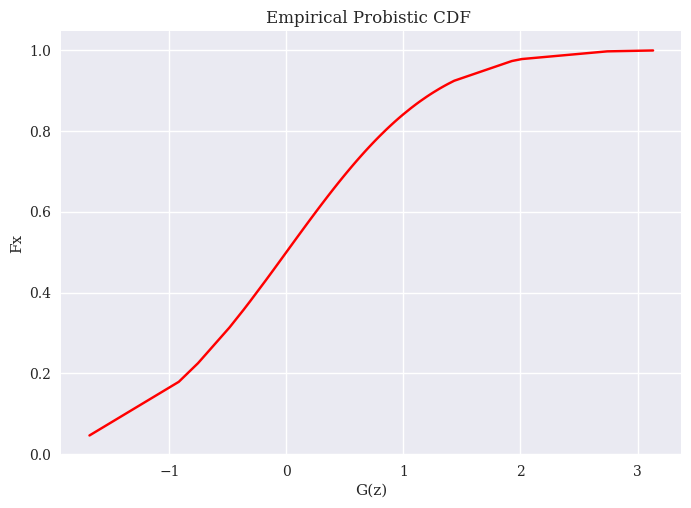

In [54]:
plt.plot(cdf_norm, stats.norm.cdf(cdf_norm), c = 'r')
plt.ylabel('Fx')
plt.xlabel('G(z)')
plt.title('Empirical Probistic CDF ')

Text(0.5, 0, '0:Negative Monthly Return; 1: Positive Monthly Return')

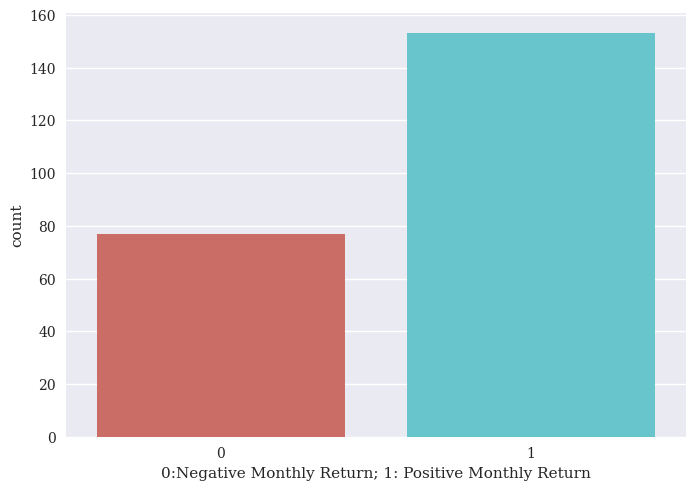

In [55]:
sns.countplot(x = 'Direction', data = direction_df,palette='hls')
plt.xlabel('0:Negative Monthly Return; 1: Positive Monthly Return')

In [56]:
print(f'The percent of positive monthly returns since March 2014 is {100*np.round(len(direction_df.loc[direction_df.Direction == 1])/len(direction_df),4)}%')
print(f'The percent of negative monthly returns since March 2014 is {100*np.round(len(direction_df.loc[direction_df.Direction == 0])/len(direction_df),4)}%')

The percent of positive monthly returns since March 2014 is 66.52%
The percent of negative monthly returns since March 2014 is 33.48%


In [57]:
xb_probit = pd.DataFrame(stats.norm.cdf(results_probit.fittedvalues), index = results_probit.fittedvalues.index)
xb_probit = xb_probit.merge(direction_df, left_index=True, right_index=True)
xb_probit.columns = ['Predicted_Probability','Direction']


In [58]:
def probit_filter(df, threshold:float):
    if df > threshold:
        prob = 1
    else:
        prob = 0
    return prob

In [59]:
xb_probit['Predicted_Direction']  =   xb_probit.Predicted_Probability.apply(probit_filter, threshold = .5)

In [60]:
print(f'The full in sample accuracy is {100*np.round(len(xb_probit.loc[xb_probit.Direction == xb_probit.Predicted_Direction])/len(xb_probit),5)}%')
print(f'The full in sample error is {100*np.round(len(xb_probit.loc[xb_probit.Direction != xb_probit.Predicted_Direction])/len(xb_probit),5)}%')

The full in sample accuracy is 75.238%
The full in sample error is 24.762%


In [66]:
xb_probit.describe()

,Predicted_Probability,Direction,Predicted_Direction
count,105.000000,105.000000,105.000000
mean,0.702575,0.704762,0.895238
std,0.183191,0.458337,0.307715
min,0.046275,0.000000,0.000000
25%,0.580532,0.000000,1.000000
50%,0.722928,1.000000,1.000000
75%,0.833439,1.000000,1.000000
max,0.999135,1.000000,1.000000


In [68]:
(xb_probit['Direction']-xb_probit['Predicted_Direction']).mean()

-0.19047619047619047

In [61]:
print(f'The probability of predicting positive returns is {100*np.round(len(xb_probit.loc[(xb_probit.Direction == 1)&(xb_probit.Predicted_Direction == 1)])/len(xb_probit.loc[xb_probit.Direction ==1]),5)}%')
print(f'The probability of predicting negative returns is {100*np.round(len(xb_probit.loc[(xb_probit.Direction == 0)&(xb_probit.Predicted_Direction == 0)])/len(xb_probit.loc[xb_probit.Direction ==0]),5)}%')

The probability of predicting positive returns is 95.946%
The probability of predicting negative returns is 25.806%


- The probit regression's accuracy of predicting future positive returns is due to the fact that majority of the time market monthly returns are positive. Within the sample period, 66% of the time the market increased in value. The beta coefficients in my model are also unbiased and consisent like the full linear regression model.So in normal financial environments, negative market returns are generally harder to predict because *sometimes there really is no explanation of why the market declined or increased. This is due to the random component of asset returns.* 



- Even though the *probit model* over estimates the probabilities of positive returns, this can be corrected by running an error correction regression.


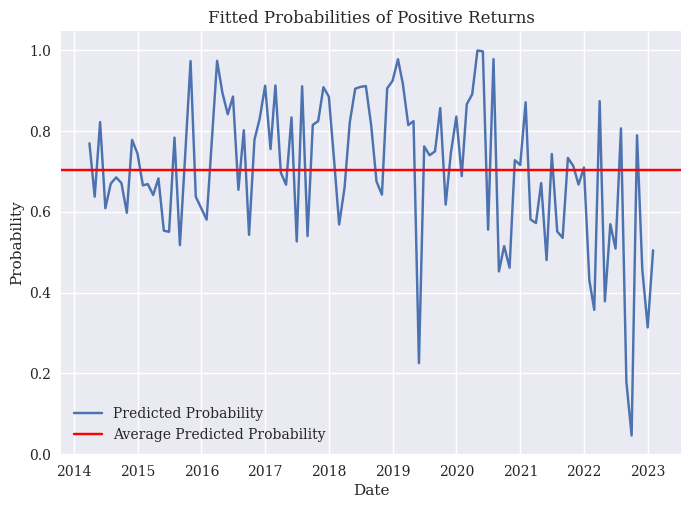

In [62]:
plt.plot(figsize =(8,6))
plt.plot(xb_probit[['Predicted_Probability']], label = 'Predicted Probability')
plt.ylabel('Probability')
plt.title('Fitted Probabilities of Positive Returns')
plt.axhline(xb_probit.Predicted_Probability.mean(), c ='r', label = 'Average Predicted Probability')
plt.xlabel('Date')
plt.legend(loc = 0)


In [63]:
# 
xb_probit.loc[xb_probit.Direction == 1].mean()

Predicted_Probability    0.750519
Direction                1.000000
Predicted_Direction      0.959459
dtype: float64

In [64]:
xb_probit[xb_probit.Direction == 0].mean()

Predicted_Probability    0.588128
Direction                0.000000
Predicted_Direction      0.741935
dtype: float64

- While my predicted probabities from the probit model do correlate to observed market returns, there will be a strong **positive bias in the predictions of my model even though I believe my coefficients to be consistent**. Particularly, the probit model generally always predicts positive market returns because it is very *restrictive*.This will definitely pose a challenge for when I run an expanding probit model. I suspect this is the issue in the probit regression, and since 66% of all months generate positive returns, I am not surprised that full-probit regression does a poor job at predicting future market downturns. 


- In order to correct for this, I will devise an an expanding regression model and an error correction model to correct for the biaseness in predicting *only the negative predicted directions*. 

## Important Note

- One extremly imporant reason why I believe an expanding regression model will do better than the probit model at predicting future market downturns is due to the fact that the regression model is a little more flexible. Market downturns happen for two reasons (1) declining financial environments and (2) because markets simply behave irrationally.**When the population of investors are faced with financial threats, investors can act in concert and irrationally, in which case risk will be punished.** Often market downturns happen very quickly!

- The only way to *predict* the *irrational* component of asset returns is to use *the unexplained* component of the regression model. I will discuss how I implement this further. 

# Trading Strategy

- In my full probit and regression models, I used the *Z_PTI_Index* as an explanatory variable. When I forecast future returns, I cannot use this variable because it assumes I know the actual distribution of the PTI_Index, which is not a good assumption. 

In [102]:
pti_values = pti_index[['PTI_Index']].shift(2)
pti_values.columns = ['PTI_Index_Lag2']
DESIGN_MATRIX = pti_values

In [103]:
DESIGN_MATRIX = DESIGN_MATRIX.merge(direction_df,left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(MARKET_lag1, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(MARKET_lag2, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(MARKET_lag3, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(MARKET_lag4, left_index=True, right_index=True)
#DESIGN_MATRIX = DESIGN_MATRIX.merge(MARKET_lag6, left_index=True, right_index=True)
#DESIGN_MATRIX = DESIGN_MATRIX.merge(MARKET_lag12, left_index=True, right_index=True)
#DESIGN_MATRIX = DESIGN_MATRIX.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

DESIGN_MATRIX = DESIGN_MATRIX.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(tsspread_lag1, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(dsspread_lag1, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(epratio_lag1, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(oil_lag, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(oil_rets_sq, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(inflation_lag2, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(inflation_yoy_sq, left_index=True, right_index=True)
DESIGN_MATRIX = DESIGN_MATRIX.merge(consumer_sentiment_lag1, left_index=True, right_index=True)
DESIGN_MATRIX.head(5)

,PTI_Index_Lag2,Direction,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,Oil_Rets_lag2,Oil_Rets_Squared,Inflation_YOY_lag2,Inflation_YOY_Squared,UMICH_Consumer_Sentiment_lag3
2014-01-31,NaN,0,0.025894,0.029638,0.046307,0.031682,0.0004,0.0253,0.0090,-0.841713,0.002998,0.000009,0.012371,0.000153,-0.055484
2014-02-28,NaN,1,-0.035248,0.025894,0.029638,0.046307,0.0006,0.0269,0.0085,-0.811184,0.008126,0.000066,0.015017,0.000226,0.025956
2014-03-31,0.000100,1,0.045516,-0.035248,0.025894,0.029638,0.0007,0.0297,0.0083,-0.859132,-0.032333,0.001045,0.015789,0.000249,0.098535
2014-04-30,0.111111,1,0.008311,0.045516,-0.035248,0.025894,0.0002,0.0265,0.0074,-0.871158,0.014074,0.000198,0.011263,0.000127,-0.015758
2014-05-31,0.179487,1,0.006952,0.008311,0.045516,-0.035248,0.0005,0.0261,0.0074,-0.881095,-0.017372,0.000302,0.015122,0.000229,0.004926


In [77]:
smf.probit(formula='Direction ~  Z_PTI_Lag2+MKT_Rets_Lag1 +MKT_Rets_lag2 ++ MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+Oil_Rets_Squared+Inflation_YOY_lag2+Inflation_YOY_Squared+UMICH_Consumer_Sentiment_lag3', data = probit_matrix)


In [104]:
def _probit_estimator(df:pd.DataFrame, pti_variable = True):
    if pti_variable == True:
        temp_model = smf.probit(formula='Direction ~  PTI_Index_Lag2 +MKT_Rets_Lag1 +MKT_Rets_lag2 ++ MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+Oil_Rets_Squared+Inflation_YOY_lag2+Inflation_YOY_Squared+UMICH_Consumer_Sentiment_lag3', data = df).fit(disp = 0).params
    else:
        temp_model = smf.probit(formula='Direction ~  MKT_Rets_Lag1 +MKT_Rets_lag2 ++ MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+Oil_Rets_Squared+Inflation_YOY_lag2+Inflation_YOY_Squared+UMICH_Consumer_Sentiment_lag3', data = df).fit(disp = 0).params


    return temp_model

In [110]:
def expanding_probit_model(window: int, df: pd.DataFrame,x_matrix: pd.DataFrame, PTI_Variable = True):
    '''
    window: enter an integer (number of months) you want to estimate coefficients
    df: input DESIGN_MATRIX
    x_matrix: Input DESIGN_MATRIX


    '''


    n_rows = df.shape[0]
    data = df.copy()
    x_mat = x_matrix.copy()
    x_mat = x_mat.drop(columns = 'Direction')
    x_mat = sm.add_constant(x_mat)
    if PTI_Variable == False:
        x_mat = x_mat.drop(columns='PTI_Index_Lag2')
    else:
        x_mat = x_mat
    
    start = window
    predictions = list()
    for i in range(start, len(data)):


        window_data = data.iloc[0:start]

        model = _probit_estimator(window_data,pti_variable=PTI_Variable)
        coef = model.values
        
        next_month_data = x_mat.iloc[i:i+1]
        

        prediction = next_month_data@ coef
        predictions.append(stats.norm.cdf(prediction.values[0]))
    # index the first prediction based on start index of dataframe
    prediction_series = pd.Series(predictions,index = df.index[start:])


    return pd.DataFrame(prediction_series, columns=['Expanding_Predicted_Direction'])

,PTI_Index_Lag2,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,MKT_Rets_Lag6,MKT_Rets_Lag12,MKT_Rets_Lag24,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,Oil_Rets_lag2,Oil_Rets_Squared,Inflation_YOY_lag2,Inflation_YOY_Squared,UMICH_Consumer_Sentiment_lag3
2014-01-31,NaN,0.025894,0.029638,0.046307,0.031682,0.051677,0.051190,0.046375,0.0004,0.0253,0.0090,-0.841713,0.002998,0.000009,0.012371,0.000153,-0.055484
2014-02-28,NaN,-0.035248,0.025894,0.029638,0.046307,-0.029992,0.012759,0.043405,0.0006,0.0269,0.0085,-0.811184,0.008126,0.000066,0.015017,0.000226,0.025956
2014-03-31,0.000100,0.045516,-0.035248,0.025894,0.029638,0.031682,0.037977,0.032158,0.0007,0.0297,0.0083,-0.859132,-0.032333,0.001045,0.015789,0.000249,0.098535
2014-04-30,0.111111,0.008311,0.045516,-0.035248,0.025894,0.046307,0.019212,-0.006676,0.0002,0.0265,0.0074,-0.871158,0.014074,0.000198,0.011263,0.000127,-0.015758
2014-05-31,0.179487,0.006952,0.008311,0.045516,-0.035248,0.029638,0.023610,-0.060056,0.0005,0.0261,0.0074,-0.881095,-0.017372,0.000302,0.015122,0.000229,0.004926


In [285]:
expanding_probit_pti = expanding_probit_model(50,DESIGN_MATRIX,DESIGN_MATRIX,True)
expanding_probit_pti['Predicted_Direction'] = expanding_probit_pti['Expanding_Predicted_Direction'].apply(probit_filter, threshold = .5)
expanding_probit_no_pti = expanding_probit_model(50,DESIGN_MATRIX,DESIGN_MATRIX,False)
expanding_probit_no_pti['Predicted_Direction'] = expanding_probit_no_pti['Expanding_Predicted_Direction'].apply(probit_filter, threshold = .5)

In [286]:
expanding_probit_pti = expanding_probit_pti.join(direction_df, how = 'inner')
expanding_probit_no_pti = expanding_probit_no_pti.join(direction_df, how = 'inner')

In [287]:
def forecast_accuracy(df:pd.DataFrame,PTI_Var = True, predicted_direction = True):
    if PTI_Var == True:
        col = str('_PTI')
    else:
        col = str('_NoPTI')
    if predicted_direction == True:
        col_var = str('Predicted_Direction')
    else:
        col_var = str('Corrected_Direction')

    accuracy_df = pd.DataFrame(data = None, index = ['Full_Model_Accuracy', 'Market_Upturn_Accuracy','Market_Downturn_Accuracy'])

    full_acc = len(df.loc[df[col_var] == df.Direction])/len(df)
    UP_ACC = len(df.loc[(df[col_var] == 1) &(df.Direction == 1)])/len(df.loc[df.Direction == 1])
    Down_Acc = len(df.loc[(df[col_var] == 0) &(df.Direction == 0)])/len(df.loc[df.Direction == 0])

    accuracy_df.loc['Full_Model_Accuracy', col] = full_acc
    accuracy_df.loc['Market_Upturn_Accuracy',col] = UP_ACC
    accuracy_df.loc['Market_Downturn_Accuracy',col] = Down_Acc

    return accuracy_df



In [247]:
str('Corrected_Direction')

'Corrected_Direction'

In [288]:
acc_df= forecast_accuracy(expanding_probit_pti,True).join(forecast_accuracy(expanding_probit_no_pti,False), how = 'inner')
acc_df.style.format("{:.2%}")

,_PTI,_NoPTI
Full_Model_Accuracy,57.63%,55.93%
Market_Upturn_Accuracy,79.49%,76.92%
Market_Downturn_Accuracy,15.00%,15.00%


- In order to get maximum likelihood estimates from the probit regression I needed at least 50 data points to start or about 4.166 years of data. 
- The accuracies are very similar with a strong prediction accuracy for future market upturns, however, a poor predictor of market downturns. 
- Additionally, the PTI_Index does give us a slight edge (1.7% ) in predicting future market returns. 

# Backtesting Basic Trading Strategy

- Here I will compute the stategy's performance **before I impose my error correction model.**

In [188]:
def probit_trade_strategy(initial_equity: float,forecast_df:pd.DataFrame, price_df:pd.DataFrame, funding_rates:pd.DataFrame, long_positions_only = False):
    initial_capital = initial_equity
    predictor_df = forecast_df.copy()
    prices = price_df.copy()
    prices = prices[['SPY']]
    collateral_rate = funding_rates.copy()

    trade_station = pd.DataFrame(columns= ['Capital','Entry_Date', 'Exit_Date', 'No_Shares','Rebate_Rate','NET_Interest','Entry_Value', 'Exit_Value','PNL', 'Cumulative_PNL','ROC'])

    for idx in predictor_df.index:
        equity = initial_capital
        month_year = str(idx)[0:7]
        entry_date = prices.loc[month_year].index[0]
        exit_date = prices.loc[month_year].index[-1]
        trade_station.loc[entry_date,'Capital'] = equity
        trade_station.loc[entry_date,'Entry_Date'] = entry_date
        trade_station.loc[entry_date,'Exit_Date'] = exit_date
        trade_station.loc[entry_date,'Rebate_Rate'] = collateral_rate.loc[entry_date].values[0]
        rate = collateral_rate.loc[entry_date].values[0]

        if long_positions_only == False:
            if predictor_df.loc[idx,'Predicted_Direction'] == 1:
            
                trade_station.loc[entry_date,'No_Shares'] = np.floor(equity/prices.loc[entry_date].values[0])
                trade_station.loc[entry_date,'NET_Interest'] = 0
                shares = trade_station.loc[entry_date,'No_Shares']
                trade_station.loc[entry_date,'Entry_Value'] = prices.loc[entry_date].values[0]  * shares
                entry_val = trade_station.loc[entry_date,'Entry_Value']

                trade_station.loc[entry_date,'Exit_Value'] = prices.loc[exit_date].values[0]*shares
                exit_val = trade_station.loc[entry_date,'Exit_Value']
                trade_station.loc[entry_date,'PNL'] = exit_val - entry_val

                trade_station.loc[entry_date,'ROC'] = (exit_val-entry_val)/entry_val

                initial_capital += trade_station.loc[entry_date,'PNL']
        
            else:

                trade_station.loc[entry_date,'No_Shares'] = - np.floor(equity/prices.loc[entry_date].values[0])
                shares = trade_station.loc[entry_date,'No_Shares']
                trade_station.loc[entry_date,'Entry_Value'] = prices.loc[entry_date].values[0]  * shares
                entry_val = trade_station.loc[entry_date,'Entry_Value']
                trade_station.loc[entry_date,'NET_Interest'] = - ((((exit_date-entry_date).days) *rate)/360)*entry_val
                net_interest = trade_station.loc[entry_date,'NET_Interest']

                trade_station.loc[entry_date,'Exit_Value'] = prices.loc[exit_date].values[0]*shares
                exit_val = trade_station.loc[entry_date,'Exit_Value']
                trade_station.loc[entry_date,'PNL'] = (exit_val+net_interest) - entry_val

                trade_station.loc[entry_date,'ROC'] = (exit_val-entry_val)/(-entry_val)

                initial_capital += trade_station.loc[entry_date,'PNL']

        else:
            if predictor_df.loc[idx,'Predicted_Direction'] == 1:
            
                trade_station.loc[entry_date,'No_Shares'] = np.floor(equity/prices.loc[entry_date].values[0])
                trade_station.loc[entry_date,'NET_Interest'] = 0
                shares = trade_station.loc[entry_date,'No_Shares']
                trade_station.loc[entry_date,'Entry_Value'] = prices.loc[entry_date].values[0]  * shares
                entry_val = trade_station.loc[entry_date,'Entry_Value']

                trade_station.loc[entry_date,'Exit_Value'] = prices.loc[exit_date].values[0]*shares
                exit_val = trade_station.loc[entry_date,'Exit_Value']
                trade_station.loc[entry_date,'PNL'] = exit_val - entry_val

                trade_station.loc[entry_date,'ROC'] = (exit_val-entry_val)/entry_val

                initial_capital += trade_station.loc[entry_date,'PNL']
            else:
                trade_station.loc[entry_date,'Entry_Date'] = entry_date
                trade_station.loc[entry_date,'Exit_Date'] = exit_date
                
                trade_station.loc[entry_date,'PNL'] = 0
                


    
    trade_station['Cumulative_PNL'] = trade_station['PNL'].cumsum()
    
    return trade_station.fillna(0)

In [289]:
probit_trade_strategy(1000,expanding_probit_pti,trade_df_cleaned,repo,False).iloc[-1]

Capital                    889.368559
Entry_Date        2023-01-03 00:00:00
Exit_Date         2023-01-31 00:00:00
No_Shares                         2.0
Rebate_Rate                    0.0317
NET_Interest                      0.0
Entry_Value                    761.64
Exit_Value                     812.96
PNL                             51.32
Cumulative_PNL             -59.311441
ROC                          0.067381
Name: 2023-01-03 00:00:00, dtype: object

In [192]:
probit_trade_strategy(1000,expanding_probit_no_pti,trade_df_cleaned,repo,False).iloc[-1]

Capital                     805.69305
Entry_Date        2023-01-03 00:00:00
Exit_Date         2023-01-31 00:00:00
No_Shares                         2.0
Rebate_Rate                    0.0317
NET_Interest                      0.0
Entry_Value                    761.64
Exit_Value                     812.96
PNL                             51.32
Cumulative_PNL             -142.98695
ROC                          0.067381
Name: 2023-01-03 00:00:00, dtype: object

- As you can see the trade strategy does not perform particularly well due to the poor prediction accuracy in forecasting market downturns. However, the model that includes the PTI index does perform slighly better with a cumulative return of $-5.9\%$, where as the model that does not include the PTI index as a factor has a cumulative return of  $-14.29865\%$.


- This provides evidence that we see a material effect in profits when we include PTI as a variable in predicting the future direction of the market. 

# Correction and Expanding Regression Model

In [196]:
DESIGN_MATRIX2 = pti_values

In [197]:
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(MARKET_RETURNS,left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(MARKET_lag1, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(MARKET_lag2, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(MARKET_lag3, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(MARKET_lag4, left_index=True, right_index=True)
#DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(MARKET_lag6, left_index=True, right_index=True)
#DESIGN_MATRIX2= DESIGN_MATRIX2.merge(MARKET_lag12, left_index=True, right_index=True)
#DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(tsspread_lag1, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(dsspread_lag1, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(epratio_lag1, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(oil_lag, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(oil_rets_sq, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(inflation_lag2, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(inflation_yoy_sq, left_index=True, right_index=True)
DESIGN_MATRIX2 = DESIGN_MATRIX2.merge(consumer_sentiment_lag1, left_index=True, right_index=True)
DESIGN_MATRIX2.head(5)

,PTI_Index_Lag2,MKT_RETS,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,Oil_Rets_lag2,Oil_Rets_Squared,Inflation_YOY_lag2,Inflation_YOY_Squared,UMICH_Consumer_Sentiment_lag3
2014-01-31,NaN,-0.035248,0.025894,0.029638,0.046307,0.031682,0.0004,0.0253,0.0090,-0.841713,0.002998,0.000009,0.012371,0.000153,-0.055484
2014-02-28,NaN,0.045516,-0.035248,0.025894,0.029638,0.046307,0.0006,0.0269,0.0085,-0.811184,0.008126,0.000066,0.015017,0.000226,0.025956
2014-03-31,0.000100,0.008311,0.045516,-0.035248,0.025894,0.029638,0.0007,0.0297,0.0083,-0.859132,-0.032333,0.001045,0.015789,0.000249,0.098535
2014-04-30,0.111111,0.006952,0.008311,0.045516,-0.035248,0.025894,0.0002,0.0265,0.0074,-0.871158,0.014074,0.000198,0.011263,0.000127,-0.015758
2014-05-31,0.179487,0.023206,0.006952,0.008311,0.045516,-0.035248,0.0005,0.0261,0.0074,-0.881095,-0.017372,0.000302,0.015122,0.000229,0.004926


In [219]:
def _regression_expanding(df:pd.DataFrame, PTI_Var = True ):
    if PTI_Var == True:
    
        temp_model = smf.ols(formula='MKT_RETS ~ PTI_Index_Lag2 + MKT_Rets_Lag1 +MKT_Rets_lag2 + MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+Oil_Rets_Squared+Inflation_YOY_lag2+Inflation_YOY_Squared+UMICH_Consumer_Sentiment_lag3', data = df).fit(disp= 0)
    else:
        temp_model = smf.ols(formula='MKT_RETS ~  MKT_Rets_Lag1 +MKT_Rets_lag2 + MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+Oil_Rets_Squared+Inflation_YOY_lag2+Inflation_YOY_Squared+UMICH_Consumer_Sentiment_lag3', data = df).fit(disp= 0)
    
    return temp_model

In [368]:
def simple_expanding_regression(df:pd.DataFrame):
    temp_model = smf.ols(formula = 'MKT_RETS ~ MKT_Rets_Lag1 + MKT_Rets_lag2+MKT_Rets_Lag3+MKT_Rets_lag4' ,data = df).fit(disp = 0)


    return temp_model




In [201]:
def _regression_error_(df:pd.DataFrame):
    temp_model = smf.ols(formula='MKT_RETS~MKT_Rets_Lag1', data = df).fit(disp=0)
    error = temp_model.resid

    return error

In [240]:
def expanding_regression_function(window:int, df:pd.DataFrame,design_matrix:pd.DataFrame, PTI_Variable = True):
    
    '''
    Use expanding_regression_fucntion2()
    expanding_regression_function2() uses last month's residual of mkt_rets on mkt_rets(t-1) to predict the error in the prediction
    '''
    data = df.copy()
    x_mat = design_matrix.copy()
    x_mat = sm.add_constant(x_mat)
    if PTI_Variable == False:
        x_mat = x_mat.drop(columns='PTI_Index_Lag2')
    else:
        x_mat = x_mat
    start = window
    errors = pd.DataFrame(data= None, columns = ['Error'])
    
    predictions = pd.DataFrame(data=None,columns=['Predicted_Return'])
    for i in range(start,len(data)):

        window_data = data.iloc[:i]

        model = _regression_expanding(window_data, PTI_Var = PTI_Variable)
        errors.loc[_regression_error_(window_data).index[-1],'Error'] = (_regression_error_(window_data).values[-1]).astype(float)
        
        next_month_data = data.iloc[i:i+1]
        
        predictions.loc[next_month_data.index[0],'Predicted_Return'] = (model.predict(next_month_data).values[0]).astype(float) 

    predictions = predictions.merge(errors,left_index=True,right_index=True)
    predictions['Corrected_Return'] = predictions['Predicted_Return'] + predictions['Error']
    return predictions

In [371]:
def expanding_regression_function2(window:int, df:pd.DataFrame,design_matrix:pd.DataFrame, PTI_Variable = True):
    
    
    data = df.copy()
    x_mat = design_matrix.copy()
    x_mat = sm.add_constant(x_mat)
    if PTI_Variable == False:
        x_mat = x_mat.drop(columns='PTI_Index_Lag2')
    else:
        x_mat = x_mat
    start = window
    errors = pd.DataFrame(data= None, columns = ['Error'])
    
    predictions = pd.DataFrame(data=None,columns=['Predicted_Return'])
    for i in range(start,len(data)):

        window_data = data.iloc[:i]

        model = simple_expanding_regression(window_data)
        #errors.loc[_regression_error_(window_data).index[-1],'Error'] = (_regression_error_(window_data).values[-1]).astype(float)
        
        next_month_data = data.iloc[i:i+1]
        errors.loc[next_month_data.index[0],'Error'] = (_regression_error_(window_data).values[-1]).astype(float)
        predictions.loc[next_month_data.index[0],'Predicted_Return'] = (model.predict(next_month_data).values[0]).astype(float) 

    predictions = predictions.merge(errors,left_index=True,right_index=True)
    # Multiply Predicted Error by .5 to be conservative 
    predictions['Corrected_Return'] = predictions['Predicted_Return'] + predictions['Error']
    return predictions

In [321]:
def expanding_regression_filter(df):
    if df > 0:
        val = 1
    else:
        val = 0
    return val

In [338]:
def error_filter(df):
    if df['Predicted_Direction'] == 1 and df['Corrected_Direction'] == 0:
        return 0
    else:
        return df['Predicted_Direction']

In [365]:
f = smf.ols('MKT_RETS~MKT_Rets_Lag1', data = DESIGN_MATRIX2).fit(disp = 0)
f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MKT_RETS   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.185
Date:                Tue, 07 Mar 2023   Prob (F-statistic):             0.0432
Time:                        16:59:14   Log-Likelihood:                 188.30
No. Observations:                 109   AIC:                            -372.6
Df Residuals:                     107   BIC:                            -367.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0116      0.004      2.729      0.007       0.003       0.020
MKT_Rets_Lag1    -0.1952      0.095     -2.046      0.043      -0.384      -0.006
==============================================================================
Omnibus:                       12.424   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.373
Skew:                          -0.728   Prob(JB):                      0.00125
Kurtosis:                       3.908   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [367]:
len(DESIGN_MATRIX2[['MKT_RETS','MKT_Rets_Lag1']])

109

In [372]:
df_1 = expanding_regression_function2(50,DESIGN_MATRIX2,DESIGN_MATRIX2,False)
df_1['Predicted_Direction'] = df_1.Predicted_Return.apply(expanding_regression_filter)
df_1['Corrected_Direction'] = df_1.Corrected_Return.apply(expanding_regression_filter)
df_1 = df_1.merge(MARKET_RETURNS, left_index=True, right_index=True)
df_1 = df_1.join(direction_df, how = 'inner')

In [373]:
df_2 = expanding_regression_function2(50,DESIGN_MATRIX2,DESIGN_MATRIX2,True)
df_2['Predicted_Direction'] = df_2.Predicted_Return.apply(expanding_regression_filter)
df_2['Corrected_Direction'] = df_2.Corrected_Return.apply(expanding_regression_filter)
df_2 = df_2.join(MARKET_RETURNS, how = 'inner')
df_2 = df_2.join(direction_df, how = 'inner')

In [380]:
forecast_accuracy(df_2,True,False)

,_PTI
Full_Model_Accuracy,0.474576
Market_Upturn_Accuracy,0.564103
Market_Downturn_Accuracy,0.300000


In [378]:
forecast_accuracy(df_1,False,True)

,_NoPTI
Full_Model_Accuracy,0.59322
Market_Upturn_Accuracy,0.74359
Market_Downturn_Accuracy,0.30000


- The expanding regression model accuracy is not as accurate as the probit regression strategy, however, the increase in market downturn accuracy is phenomenal.
- Additionally, regardless of whether or not PTI is included in the model does not have an efect on the full model accuracy. 

# Corrected Directions

- Since the probit model is not accurate in predicting market downturns, I want to combine the expanding corrected errror regression predictions with the probit model predictions in such a way that if the predicted direction of spy is 1 and the corrected direction of the expanding regression is 0, I will change that the predicted direction to 0. 

In [379]:
df_1

,Predicted_Return,Error,Corrected_Return,Predicted_Direction,Corrected_Direction,MKT_RETS,Direction
2018-03-31,0.009926,-0.034768,-0.024841,1,0,-0.027415,0
2018-04-30,0.028521,-0.045468,-0.016947,1,0,0.005168,1
2018-05-31,0.026088,-0.010573,0.015515,1,1,0.024309,1
2018-06-30,0.019675,0.014292,0.033967,1,1,0.005757,1
2018-07-31,0.010632,-0.000689,0.009943,1,1,0.037047,1
2018-08-31,0.001244,0.026648,0.027892,1,1,0.031920,1
2018-09-30,-0.004582,0.026457,0.021875,0,1,0.005950,1
2018-10-31,0.001133,-0.000379,0.000754,1,1,-0.069104,0
2018-11-30,0.023405,-0.078468,-0.055063,1,0,0.018549,1
2018-12-31,0.031248,-0.002635,0.028614,1,1,-0.087936,0


In [343]:
def error_filter(df):
    if df['Predicted_Direction'] == 1 and df['Corrected_Direction'] == 0:
        return 0
    else:
        return df['Predicted_Direction']

In [358]:
expanding_probit_pti1 = expanding_probit_pti.join(df_2[['Corrected_Direction']], how = 'inner')

In [347]:
expanding_probit_pti1['Predicted_Direction'] = expanding_probit_pti1.apply(error_filter, axis  = 1)

In [351]:
forecast_accuracy(expanding_probit_pti1,True,False)

,_PTI
Full_Model_Accuracy,0.576271
Market_Upturn_Accuracy,0.615385
Market_Downturn_Accuracy,0.500000


In [364]:
expanding_probit_pti1

,Expanding_Predicted_Direction,Predicted_Direction,Direction,Corrected_Direction
2018-03-31,9.996887e-01,1,0,1
2018-04-30,1.000000e+00,1,1,1
2018-05-31,1.000000e+00,1,1,1
2018-06-30,1.000000e+00,1,1,1
2018-07-31,1.000000e+00,1,1,1
2018-08-31,1.000000e+00,1,1,1
2018-09-30,1.000000e+00,1,1,1
2018-10-31,1.000000e+00,1,0,0
2018-11-30,1.000000e+00,1,1,0
2018-12-31,1.000000e+00,1,0,1
